In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use("fivethirtyeight")

In [3]:
Trackman = pd.read_csv("/Users/tg/Downloads/tmData22.csv", low_memory = False)

For summer project, I aimed to analyze how effective velocity of a pitch can change the impact of a hit. Effective velocity changes depending on the height, altitude the ball is thrown at, spin, and how far off the plate the ball leaves the pitcher, among other factors. Effective velocity aims to measure the perceived speed of the pitch rather than its true velocity, which at game time, can mean more to the hitter. Effective velocity, is therefore, important for a pitcher to be able to manipulate, and being able to throw the ball so it is perceived as faster or slower can greatly impact a pitcher's success at strikeout. Not only that, but being able to sequence the pitches to throw off the hitter is important as well.

I wanted to start by filtering the data for pitches made by the UNC Baseball team only

In [4]:
Trackman_Pitchers = Trackman.loc[Trackman["PitcherTeam"] == "NOR_TAR"]
Trackman_Pitchers

,Unnamed: 0,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,...,preseason,regularszn,isScrimmage,szTop,szBot,DateForBatters,DateForPitchers,Throws,fall,TaggedHitType
0,1,1,10/1/21,1/1/00 14:58,1.0,1,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,0,0,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN
1,2,2,10/1/21,1/1/00 14:59,1.0,2,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,0,0,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN
2,3,3,10/1/21,1/1/00 14:59,1.0,3,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,0,0,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN
3,4,4,10/1/21,1/1/00 14:59,1.0,4,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,0,0,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN
4,5,5,10/1/21,1/1/00 15:00,1.0,5,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,0,0,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24986,24987,260,6/12/22,16:37:00,3.0,4,"Palermo, Davis",1.000013e+09,Right,NOR_TAR,...,0,1,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Right,0.0,NaN
24987,24988,261,6/12/22,17:03:00,3.0,5,"Palermo, Davis",1.000013e+09,Right,NOR_TAR,...,0,1,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Right,0.0,NaN
24988,24989,262,6/12/22,17:47:00,4.0,1,"Palermo, Davis",1.000013e+09,Right,NOR_TAR,...,0,1,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Right,0.0,GroundBall
24989,24990,263,6/12/22,17:47:00,5.0,1,"O'Brien, Caden",1.000013e+09,Left,NOR_TAR,...,0,1,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Left,0.0,NaN


The following is the function I created to calculate the effective velocity of each pitch made throughout the season. The EV depends on the location of the ball laterally on the plate, its height at exit, the extension made by the batter (how far it left from the plate), and whether the pitcher is right or left handed.

In [5]:
#

def EV(df):
    x = df["PlateLocSide"]
    y = df["PlateLocHeight"]
    e = df["Extension"]
    t = df["ZoneTime"]
    side = df["BatterSide"]
    for a in x:
        for b in y:
            for c in e:
                for d in t:
                    for e in side:
                        num_miles = (60.5-c)/5280
                        num_hours = t/3600
                        v = num_miles/num_hours
                        coeff = 0
                        if e == "Right":
                            coeff = ((2.75/6)*(3.41-y))/(8.5/12-x)
                        elif e == "Left":
                            coeff = ((2.75/6)*(3.41-y))/(x-8.5/12)
                        return v + coeff

In [6]:
EV(Trackman_Pitchers)

0        89.773971
1        79.785283
2        81.184854
3        89.738417
4        90.929253
           ...    
24986    92.284992
24987    90.533514
24988    83.974179
24989    74.138231
24990    85.871616
Length: 14645, dtype: float64

In [7]:
Trackman_Pitchers["EV"] = EV(Trackman_Pitchers)

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/4121724374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trackman_Pitchers["EV"] = EV(Trackman_Pitchers)


In [8]:
Trackman_Pitchers.drop('Unnamed: 0', axis = 1)
Trackman_Pitchers.drop('Notes', axis = 1)
Trackman_Pitchers = Trackman_Pitchers[Trackman_Pitchers['Time'].notna()]

col_list = list(Trackman_Pitchers)
print(col_list)

['Unnamed: 0', 'PitchNo', 'Date', 'Time', 'PAofInning', 'PitchofPA', 'Pitcher', 'PitcherId', 'PitcherThrows', 'PitcherTeam', 'Batter', 'BatterId', 'BatterSide', 'BatterTeam', 'PitcherSet', 'Inning', 'Top.Bottom', 'Outs', 'Balls', 'Strikes', 'TaggedPitchType', 'AutoPitchType', 'PitchCall', 'KorBB', 'HitType', 'PlayResult', 'OutsOnPlay', 'RunsScored', 'Notes', 'RelSpeed', 'VertRelAngle', 'HorzRelAngle', 'SpinRate', 'SpinAxis', 'Tilt', 'RelHeight', 'RelSide', 'Extension', 'VertBreak', 'InducedVertBreak', 'HorzBreak', 'PlateLocHeight', 'PlateLocSide', 'ZoneSpeed', 'VertApprAngle', 'HorzApprAngle', 'ZoneTime', 'ExitSpeed', 'Angle', 'Direction', 'HitSpinRate', 'PositionAt110X', 'PositionAt110Y', 'PositionAt110Z', 'Distance', 'LastTrackedDistance', 'Bearing', 'HangTime', 'pfxx', 'pfxz', 'x0', 'y0', 'z0', 'vx0', 'vy0', 'vz0', 'ax0', 'ay0', 'az0', 'HomeTeam', 'AwayTeam', 'Stadium', 'Level', 'League', 'GameID', 'PitchUID', 'PlayID', 'EffectiveVelo', 'MaxHeight', 'MeasuredDuration', 'SpeedDrop', 

Here, I create a table to showcase the mean EV for each pitcher by pitch type to further analyze the effective velocity by pitcher.

In [15]:
metric_pivot_table = pd.pivot_table(Trackman_Pitchers, values='EV', index="Pitcher",
                    columns=['TaggedPitchType'], aggfunc=np.mean)
metric_pivot_table.head()

TaggedPitchType,CH,CT,CU,FB,SL,SP,Undefined
Pitcher,,,,,,,
"Argento, Nick",84.608894,NaN,NaN,86.336778,78.091875,NaN,NaN
"Bovair, Connor",79.312407,NaN,76.693032,89.186189,80.278507,NaN,86.554504
"Carlson, Maxwell",79.497114,NaN,79.883688,89.937100,83.449694,NaN,81.542152
"Cozart, Caleb",78.846163,NaN,67.225646,86.823684,82.594561,NaN,NaN
"Daniels, Brett",91.529627,NaN,NaN,88.916216,74.849441,NaN,NaN


I also wanted to calculate Bauer Units, which are a ratio of spin rate to relative speed, that determine how the spin affects the speed as well. I want to include this in my analysis of EV as well.

In [10]:
def bauer(spin, velo):
    return spin/velo
Trackman_Pitchers["Bauer Units"] = Trackman_Pitchers["SpinRate"]/Trackman_Pitchers["RelSpeed"]
Trackman_Pitchers

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/3305631243.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trackman_Pitchers["Bauer Units"] = Trackman_Pitchers["SpinRate"]/Trackman_Pitchers["RelSpeed"]


,Unnamed: 0,PitchNo,Date,Time,PAofInning,PitchofPA,Pitcher,PitcherId,PitcherThrows,PitcherTeam,...,isScrimmage,szTop,szBot,DateForBatters,DateForPitchers,Throws,fall,TaggedHitType,EV,Bauer Units
0,1,1,10/1/21,1/1/00 14:58,1.0,1,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN,89.773971,22.452926
1,2,2,10/1/21,1/1/00 14:59,1.0,2,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN,79.785283,23.833188
2,3,3,10/1/21,1/1/00 14:59,1.0,3,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN,81.184854,16.996731
3,4,4,10/1/21,1/1/00 14:59,1.0,4,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN,89.738417,25.570968
4,5,5,10/1/21,1/1/00 15:00,1.0,5,"Bovair, Connor",1.000113e+09,Right,NOR_TAR,...,True,3.316,1.525,10/1/21 - NOR_TAR,10/1/21 - NOR_TAR,Right,NaN,NaN,90.929253,24.884028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24986,24987,260,6/12/22,16:37:00,3.0,4,"Palermo, Davis",1.000013e+09,Right,NOR_TAR,...,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Right,0.0,NaN,92.284992,24.747137
24987,24988,261,6/12/22,17:03:00,3.0,5,"Palermo, Davis",1.000013e+09,Right,NOR_TAR,...,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Right,0.0,NaN,90.533514,24.624385
24988,24989,262,6/12/22,17:47:00,4.0,1,"Palermo, Davis",1.000013e+09,Right,NOR_TAR,...,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Right,0.0,GroundBall,83.974179,24.394444
24989,24990,263,6/12/22,17:47:00,5.0,1,"O'Brien, Caden",1.000013e+09,Left,NOR_TAR,...,False,3.316,1.525,06/12/22 - NOR_TAR,06/12/22 - Arkansas,Left,0.0,NaN,74.138231,18.307999


In the code before, I want to clean and organize the data to solely focus on pitch speed (both true speed and effecitve velocity) and picther for the entire season. This will help to visualize the data more clearly.

In [11]:
Trackman_Pitchers["Date"] = pd.to_datetime(Trackman_Pitchers["Date"])
comparing_pitches = Trackman_Pitchers[["Date", "Pitcher", "TaggedPitchType", "PitchCall", "RelSpeed", "ExitSpeed", "EV", "Bauer Units"]]
comparing_pitches = comparing_pitches[comparing_pitches['PitchCall'] != 'BallCalled']
comparing_pitches = comparing_pitches[comparing_pitches['TaggedPitchType'] != 'Undefined']
comparing_pitches

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/2788612667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Trackman_Pitchers["Date"] = pd.to_datetime(Trackman_Pitchers["Date"])


,Date,Pitcher,TaggedPitchType,PitchCall,RelSpeed,ExitSpeed,EV,Bauer Units
1,2021-10-01,"Bovair, Connor",FB,FoulBall,92.02,89.67,79.785283,23.833188
2,2021-10-01,"Bovair, Connor",CH,BallinDirt,85.66,NaN,81.184854,16.996731
3,2021-10-01,"Bovair, Connor",FB,FoulBall,93.07,65.38,89.738417,25.570968
4,2021-10-01,"Bovair, Connor",FB,InPlay,93.04,91.83,90.929253,24.884028
6,2021-10-01,"Bovair, Connor",SL,StrikeSwinging,86.14,NaN,83.093972,29.095658
...,...,...,...,...,...,...,...,...
24980,2022-06-12,"Palermo, Davis",FB,StrikeCalled,93.88,NaN,91.769835,25.080741
24982,2022-06-12,"Palermo, Davis",CU,InPlay,83.27,106.93,79.800448,24.422961
24983,2022-06-12,"Palermo, Davis",FB,StrikeCalled,93.46,NaN,89.678990,25.003959
24988,2022-06-12,"Palermo, Davis",SL,InPlay,86.40,88.53,83.974179,24.394444


Below, I wanted to collect a list of all the pitchers with pitching data in the season.

In [12]:
pitchers = comparing_pitches.Pitcher.unique()
print(pitchers)

['Bovair, Connor' 'Schaeffer, Brandon' 'Pry, Nik' 'Gillian, Gage'
 'Palermo, Davis' 'Sandy, Will' 'Rapp, Shawn' "O'Brien, Caden"
 'Peavyhouse, Shaddon' 'Starnes, Carson' 'Ollio, Connor' 'Cozart, Caleb'
 'Mott, Kyle' 'Segui, Alden' 'James, Nick' 'Quick, Tanner' 'Argento, Nick'
 'Flynn, Owen' 'Carlson, Maxwell' 'Daniels, Brett']


The code for the rest of the project displays the analysis for the first pitcher in the list, Connor Bovair. However, there is graphical analysis of each player available by switching out which player is not commented in this section. Each player has a different effective velocity and different sequential order of success.

In [13]:
pitches= comparing_pitches[comparing_pitches.Pitcher == 'Bovair, Connor']
pitches
#pitches_Schaeffer = comparing_pitches[comparing_pitches.Pitcher == 'Schaeffer, Brandon']
#pitches_Schaeffer
#pitches_Pry = comparing_pitches[comparing_pitches.Pitcher == 'Pry, Nik']
#pitches_Pry
#pitches_Gillian = comparing_pitches[comparing_pitches.Pitcher == 'Gillian, Gage']
#pitches_Gillian
#pitches_Palermo = comparing_pitches[comparing_pitches.Pitcher == 'Palermo, Davis']
#pitches_Palermo
#pitches_Sandy = comparing_pitches[comparing_pitches.Pitcher == 'Sandy, Will']
#pitches_Sandy
#pitches_Rapp = comparing_pitches[comparing_pitches.Pitcher == 'Rapp, Shawn']
#pitches_Rapp
#pitches_Obrien = comparing_pitches[comparing_pitches.Pitcher == 'O\'Brien, Caden']
#pitches_Obrien
#pitches_Peavyhouse = comparing_pitches[comparing_pitches.Pitcher == 'Peavyhouse, Shaddon']
#pitches_Peavyhouse
#pitches_Starnes = comparing_pitches[comparing_pitches.Pitcher == 'Starnes, Carson']
#pitches_Starnes
#pitches_Ollio = comparing_pitches[comparing_pitches.Pitcher == 'Ollio, Connor']
#pitches_Ollio
#pitches_Cozart = comparing_pitches[comparing_pitches.Pitcher == 'Cozart, Caleb']
#pitches_Cozart
#pitches_Mott = comparing_pitches[comparing_pitches.Pitcher == 'Mott, Kyle']
#pitches_Mott
#pitches_Segui = comparing_pitches[comparing_pitches.Pitcher == 'Segui, Alden']
#pitches_Segui
#pitches_James = comparing_pitches[comparing_pitches.Pitcher == 'James, Nick']
#pitches_James
#pitches_Quick = comparing_pitches[comparing_pitches.Pitcher == 'Quick, Tanner']
#pitches_Quick
#pitches_Argento = comparing_pitches[comparing_pitches.Pitcher == 'Argento, Nick']
#pitches_Argento
#pitches_Flynn = comparing_pitches[comparing_pitches.Pitcher == 'Flynn, Owen']
#pitches_Flynn
#pitches_Carlson = comparing_pitches[comparing_pitches.Pitcher == 'Carlson, Maxwell']
#pitches_Carlson
#pitches_Daniels = comparing_pitches[comparing_pitches.Pitcher == 'Daniels, Brett']
#pitches_Daniels

,Date,Pitcher,TaggedPitchType,PitchCall,RelSpeed,ExitSpeed,EV,Bauer Units
1,2021-10-01,"Bovair, Connor",FB,FoulBall,92.02,89.67,79.785283,23.833188
2,2021-10-01,"Bovair, Connor",CH,BallinDirt,85.66,NaN,81.184854,16.996731
3,2021-10-01,"Bovair, Connor",FB,FoulBall,93.07,65.38,89.738417,25.570968
4,2021-10-01,"Bovair, Connor",FB,InPlay,93.04,91.83,90.929253,24.884028
6,2021-10-01,"Bovair, Connor",SL,StrikeSwinging,86.14,NaN,83.093972,29.095658
...,...,...,...,...,...,...,...,...
24175,2022-06-05,"Bovair, Connor",FB,InPlay,90.40,86.70,86.955258,26.630531
24176,2022-06-05,"Bovair, Connor",FB,FoulBall,90.74,70.03,87.682871,26.353868
24177,2022-06-05,"Bovair, Connor",FB,FoulBall,91.58,69.85,88.986700,25.942345
24178,2022-06-05,"Bovair, Connor",FB,InPlay,90.98,NaN,88.199235,25.698945


Here, the pitches with no exit velocity are replaced with a 0.

In [14]:
# for Connor Bovair, can be applied to any pitcher
#pitches = pitches.sort_values(by = 'ExitSpeed', na_position = 'first')
pitches['ExitSpeed'] = pitches['ExitSpeed'].fillna(0)
pitches

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/3893477328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches['ExitSpeed'] = pitches['ExitSpeed'].fillna(0)


,Date,Pitcher,TaggedPitchType,PitchCall,RelSpeed,ExitSpeed,EV,Bauer Units
1,2021-10-01,"Bovair, Connor",FB,FoulBall,92.02,89.67,79.785283,23.833188
2,2021-10-01,"Bovair, Connor",CH,BallinDirt,85.66,0.00,81.184854,16.996731
3,2021-10-01,"Bovair, Connor",FB,FoulBall,93.07,65.38,89.738417,25.570968
4,2021-10-01,"Bovair, Connor",FB,InPlay,93.04,91.83,90.929253,24.884028
6,2021-10-01,"Bovair, Connor",SL,StrikeSwinging,86.14,0.00,83.093972,29.095658
...,...,...,...,...,...,...,...,...
24175,2022-06-05,"Bovair, Connor",FB,InPlay,90.40,86.70,86.955258,26.630531
24176,2022-06-05,"Bovair, Connor",FB,FoulBall,90.74,70.03,87.682871,26.353868
24177,2022-06-05,"Bovair, Connor",FB,FoulBall,91.58,69.85,88.986700,25.942345
24178,2022-06-05,"Bovair, Connor",FB,InPlay,90.98,0.00,88.199235,25.698945


This bar graph visualizes which pitch type results in the greatest number of missed hits. In the case of Connor Bovair, fastballs result in the greatest number of missed hits. The effective velocity of a fastball is usually increased as fastballs are thrown high and close to the plate. This graph solely counts the frequency of missed hits according to type of pitch, but doesn't take into account the effective velocity of the pitch. With further analysis, we could see that the rate at which pitch types are missed could change depending on the effective velocities. 

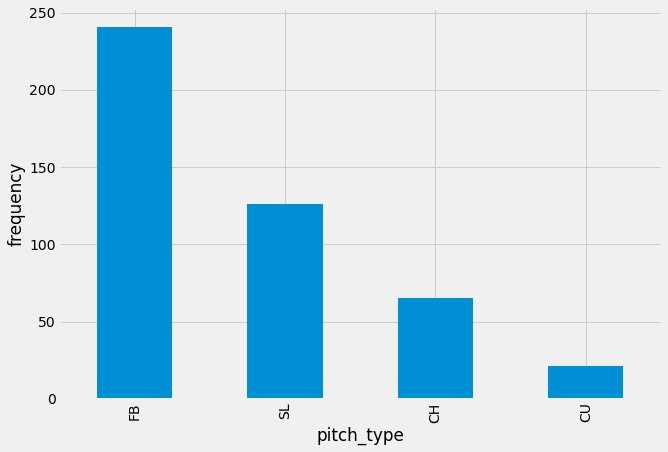

In [16]:
# if we want to look at the type of pitch that resulted in the greatest number of missed hits:
pitches_missed_hits = pitches[pitches['ExitSpeed'] == 0.0]
plots.rcParams["figure.figsize"] = [9.50, 6.50]
plots.rcParams["figure.autolayout"] = True

fig, ax = plots.subplots()
pitches_missed_hits['TaggedPitchType'].value_counts().plot(ax=ax, kind='bar', xlabel='pitch_type', ylabel='frequency')
plots.show()

Here, I take a look at the impact that pitch velocity has on pitch type. I take the aggregate difference of exit speed and effective velocity for Connor Bovair's pitches to see how the perceived speed changes for each pitch type. It is interesting to see that the perceived velocity decreased for each pitch type for Bovair, indicating that his pitches are perceived slower than they actually are. Fastballs are the second slowest, meaning that the hitter thinks they have more time to react than they actually do.

In [17]:
#Furthermore, let's look at the pitch velocity differences per pitch type
pitches_diff = pitches
pitches_diff['VelDiff'] = pitches_diff['EV'] - pitches_diff['RelSpeed']
pitches_diff_sub = pitches_diff[['TaggedPitchType', 'VelDiff']]
pitches_diff_sub = pitches_diff_sub.groupby(['TaggedPitchType']).mean()
pitches_diff_sub

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/699989312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_diff['VelDiff'] = pitches_diff['EV'] - pitches_diff['RelSpeed']


,VelDiff
TaggedPitchType,
CH,-0.259623
CU,6.272468
FB,-2.572569
SL,-2.848052


In my first attempt to visualize these differences, I created a scatterplot to show how the exit speed changes with the velocity differences. However, this graph is extremeley unclear, indicating that there is no trend for how exit speed changes according to velocity differences and therefore no correlation between perceived "slower" or "faster" pitches for Bovair.

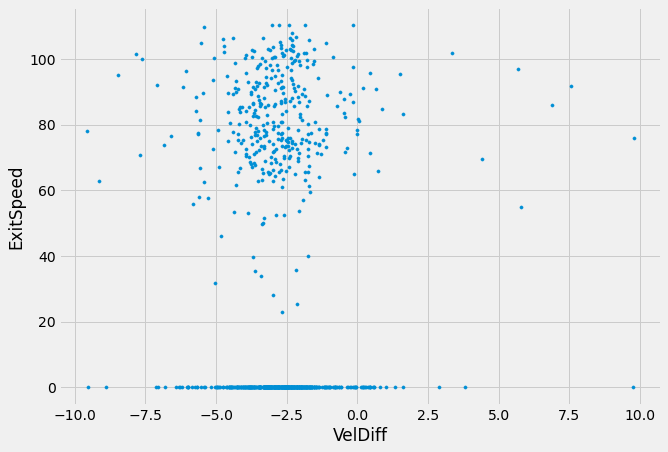

In [18]:
#Generally, the success of a hit can be quantified by the exit speed, or the speed that the ball leaves the bat on contact.
#The pitcher would like to minimize this as much as possible
#Let's see how EV can effect a hit
pitches_diff = pitches_diff[pitches_diff.VelDiff > -10]
pitches_diff = pitches_diff[pitches_diff.VelDiff < 10]
pitches_diff.plot.scatter(x = 'VelDiff', y = 'ExitSpeed', s = 10);

Next, I decided to bin each velocity difference, from a range of -10 to +10 (-10 being a perceived pitch speed difference of 10mph slower and +10 being a perceived pitch differenc eof 10mph faster). Next, I counted the frequency of missed hits that were in each bin of velocity difference. The graph shows that the majority of missed hits occured at velocity differences of -6mph to +1mph, with the peak occuring at -3mph to -2mph. Therefore, Bovair has been most successful in that range of frequency hits. Furthermore, the graph is skewed to the left, indicating that Bovair tends to pitch with a decreased effective velocity more frequently and that the lower percived pitches result in a higher frequency of missed hits. Looking at the previous data and the pitch types that resulted in the highest number of missed hits and their respective velocity differences, this data backs up the notion that fastballs tend to result in the largest number of missed hits.

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/496675278.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_missed_hits['VelDiff'] = pitches_missed_hits['EV'] - pitches_missed_hits['RelSpeed']
/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/496675278.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_missed_hits['binned'] = pd.cut(pitches_missed_hits['VelDiff'], bins=bins)


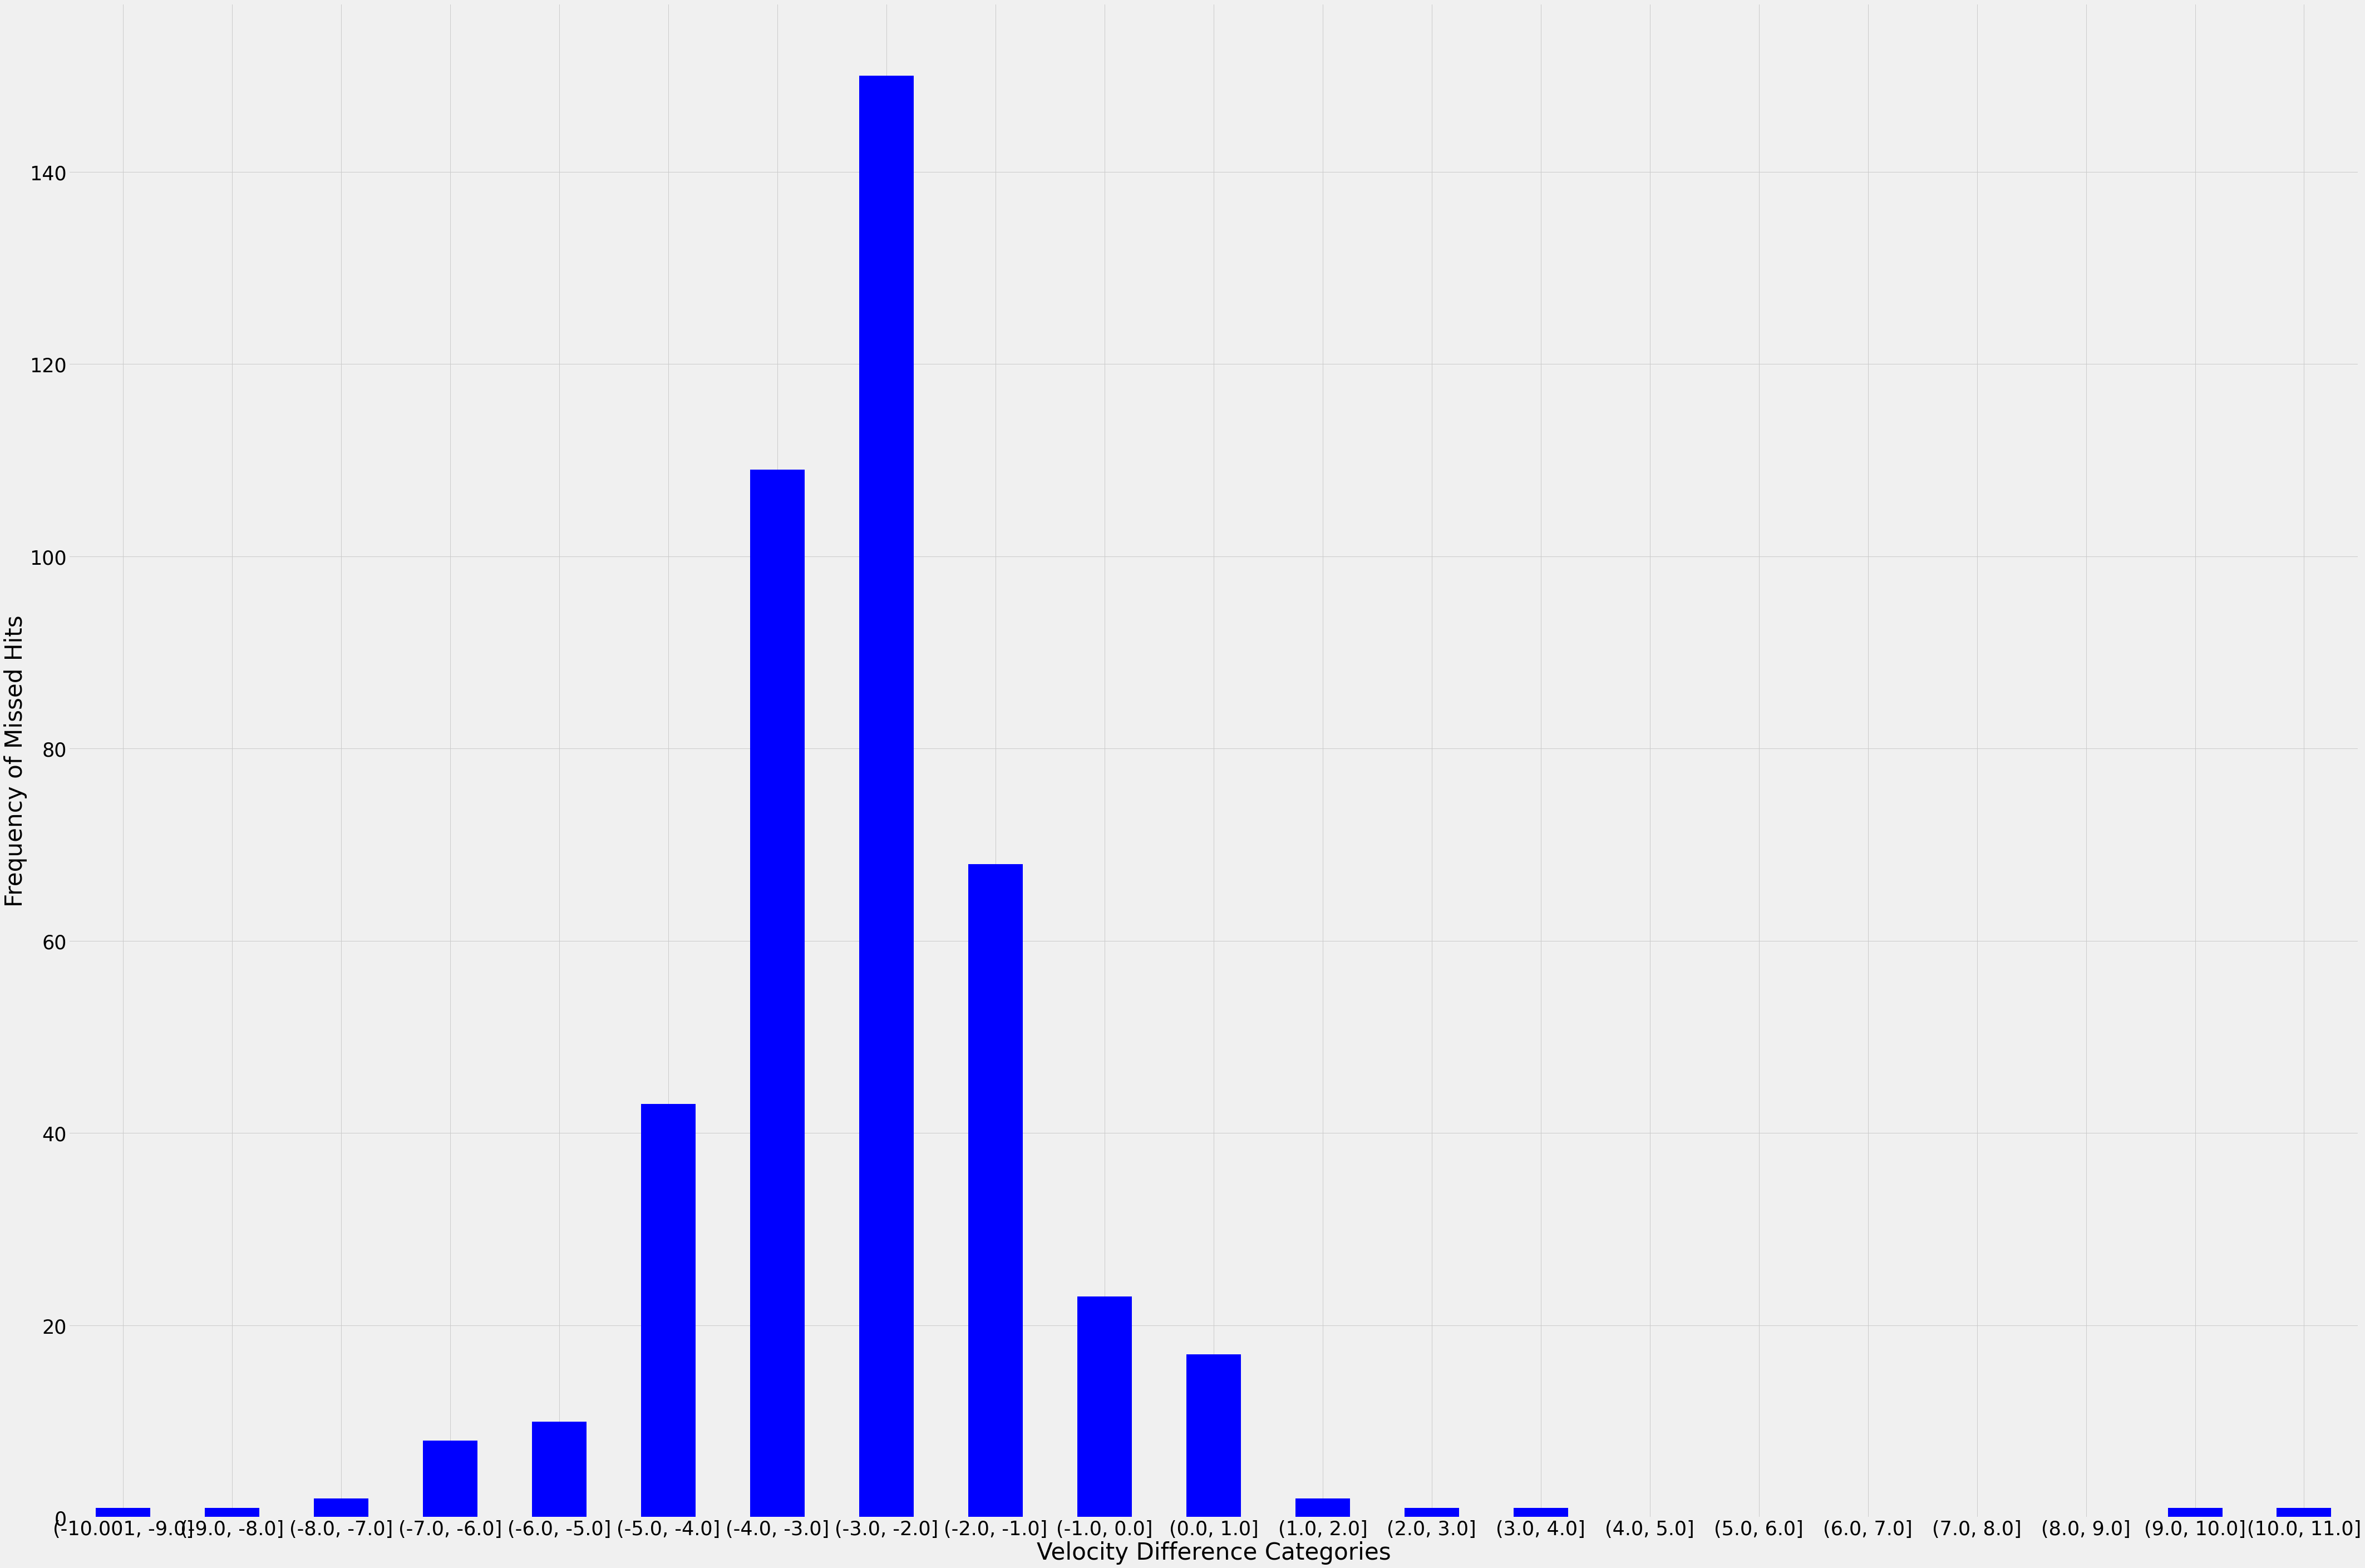

In [20]:
#We can look at the bins of velocity differences too see which EV caused the greatest number of missed hits
pitches_missed_hits['VelDiff'] = pitches_missed_hits['EV'] - pitches_missed_hits['RelSpeed']
bins = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11]
pitches_missed_hits['binned'] = pd.cut(pitches_missed_hits['VelDiff'], bins=bins)
plots.figure()
plots.rcParams.update({'font.size': 35}) # must set in top
p = pd.cut(pitches_missed_hits['VelDiff'], bins=bins, include_lowest=True)
ax = p.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(60,40))
ax.set_xlabel("Velocity Difference Categories")
ax.set_ylabel("Frequency of Missed Hits")
plots.show()

To see the inverse, I wanted to see how the number of hard hits changes according to different effective velocities and by pitch type for Bovair. Here, instead of including the missed hit data, I include the hard hit data instead to visualize these relationships.

In [21]:
#Now, let's check Hard Hit % to see which pitch types and at which EV produce the largest number of hard hits
pitches['HardHit%'] = Trackman_Pitchers['Hard_Hit']
pitches_hard_hits = pitches[pitches['HardHit%'] == 'Hard Hit']
pitches_hard_hits

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/414633257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches['HardHit%'] = Trackman_Pitchers['Hard_Hit']


,Date,Pitcher,TaggedPitchType,PitchCall,RelSpeed,ExitSpeed,EV,Bauer Units,VelDiff,HardHit%
28,2021-10-01,"Bovair, Connor",SL,InPlay,81.82,97.55,79.343884,30.699218,-2.476116,Hard Hit
72,2021-10-01,"Bovair, Connor",FB,InPlay,89.22,93.51,86.912814,26.267093,-2.307186,Hard Hit
74,2021-10-01,"Bovair, Connor",FB,InPlay,89.53,94.08,87.178144,26.222048,-2.351856,Hard Hit
244,2021-10-10,"Bovair, Connor",FB,InPlay,92.49,101.55,84.665431,24.729052,-7.824569,Hard Hit
256,2021-10-10,"Bovair, Connor",SL,InPlay,81.83,102.35,78.186293,30.357204,-3.643707,Hard Hit
...,...,...,...,...,...,...,...,...,...,...
22911,2022-05-29,"Bovair, Connor",FB,InPlay,92.40,110.29,92.231232,25.972944,-0.168768,Hard Hit
23122,2022-06-03,"Bovair, Connor",FB,InPlay,95.07,100.77,92.449366,23.985590,-2.620634,Hard Hit
23170,2022-06-03,"Bovair, Connor",FB,InPlay,93.68,103.50,90.699901,24.985589,-2.980099,Hard Hit
24097,2022-06-05,"Bovair, Connor",SL,InPlay,83.67,101.66,81.771172,27.891239,-1.898828,Hard Hit


Interestingly, fastballs also produce the largest number of hard hits. Additionally, the hard hit EV comparison also looks very similar to the missed hit EV comparison, with the peak being in the range of -3mph to -2 mph and the data being skewed to the left as well. I wanted to see if this was because Bovair tends to pitch in a single velocity difference much more often than other velocuty ranges, so I want to look at ratios next.

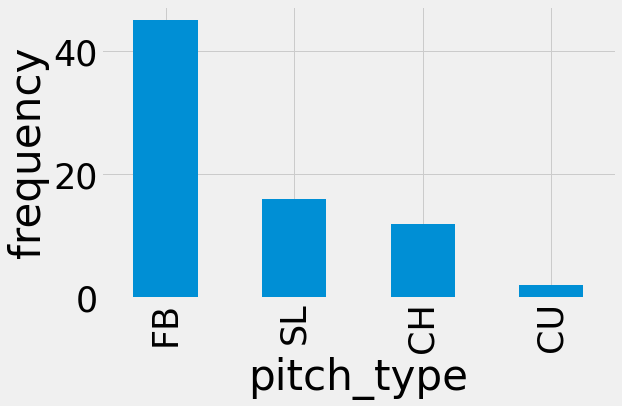

In [22]:
plots.rcParams["figure.figsize"] = [9.50, 6.50]
plots.rcParams["figure.autolayout"] = True

fig, ax = plots.subplots()
pitches_hard_hits['TaggedPitchType'].value_counts().plot(ax=ax, kind='bar', xlabel='pitch_type', ylabel='frequency')
plots.show()

/var/folders/0z/90_vcmlx58n15538wb8bcymm0000gn/T/ipykernel_28424/3966344194.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pitches_hard_hits['binned'] = pd.cut(pitches_hard_hits['VelDiff'], bins=bins)


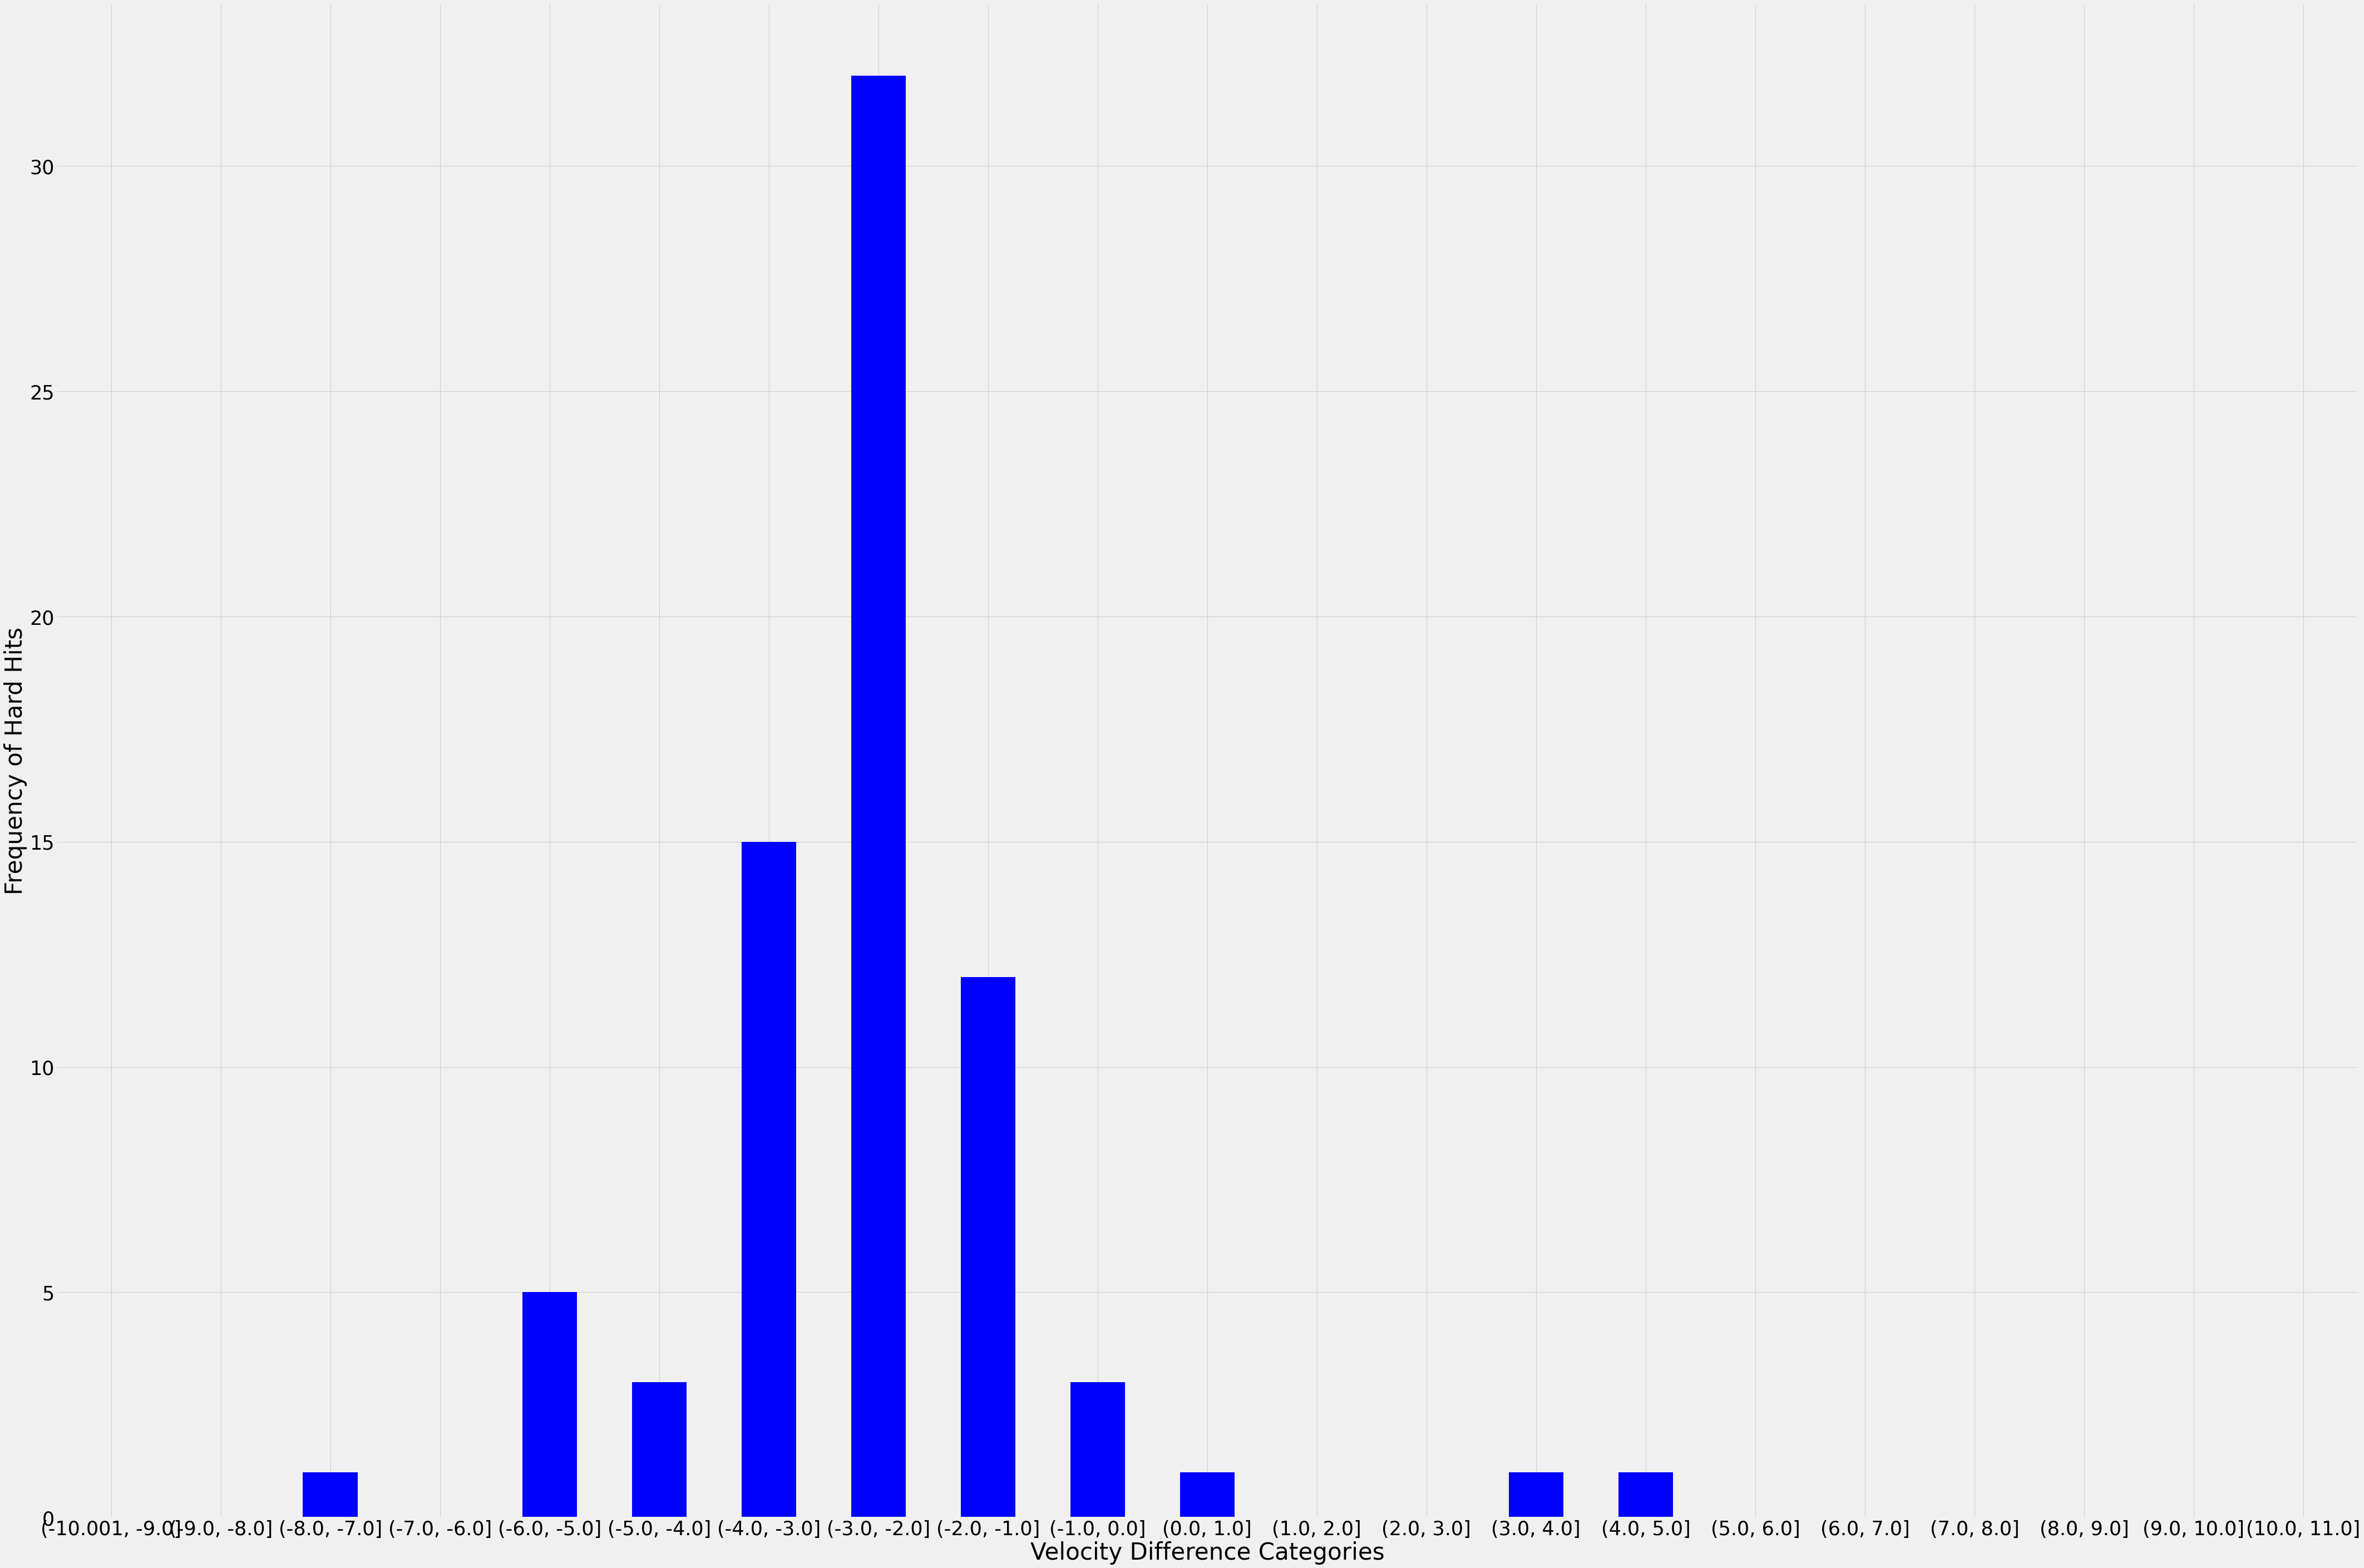

In [23]:
#Showing which velocity differences cause the hardest hits
bins = [-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10,11]
pitches_hard_hits['binned'] = pd.cut(pitches_hard_hits['VelDiff'], bins=bins)
plots.figure()
plots.rcParams.update({'font.size': 35}) # must set in top
p2 = pd.cut(pitches_hard_hits['VelDiff'], bins=bins, include_lowest=True)
ax = p2.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(60,40))
ax.set_xlabel("Velocity Difference Categories")
ax.set_ylabel("Frequency of Hard Hits")
plots.show()

It was hard to tell previously what pitch type and what EV range was most successful for Bovair, because both his missed hits and hard hits frequency were the largest in the same pitch type and EV range. This means that I had to look at percentages of the missed hits to hard hits for each EV and each pitch type, because the data was most likely impacted by the fact that Bovair tends to hit one pitch type much more frequently than other types. As seen on the graph, the percentage of missed hits is lower in the ranges it was higher in in the previous graphs.

Conversely, in the extreme ends of the graphs, where the pitch velocities varied the most, the abolute graph showed the least number of missed hits, but the percentage shows the greatest number of missed hits. That means the ratio of missed hits to pitches thrown was higher in the upper and lower ranges of the velocity differences. However, there is no upward or downward trend between the velocity bins and the percentage of missed hits. This means that certain ranges have greater success than others, but there is no correlation for Bovair between faster or slower perceived velocities and a higher success rate. Instead, Bovair performs more successfully in the more extreme ends and certain middle values.

In [25]:
#Just by looking at the graphs above, it's hard to tell which type of pitch results in the greatest percentage of missed balls
#We are going to look at the ratio of missed balls as a total of missed and hard hit balls for each bin of velocity differences
missed_counts = p.value_counts()
hard_hit_counts = p2.value_counts()
missed_ratio = missed_counts/(missed_counts+hard_hit_counts)
missed_ratio = missed_ratio.fillna(0)


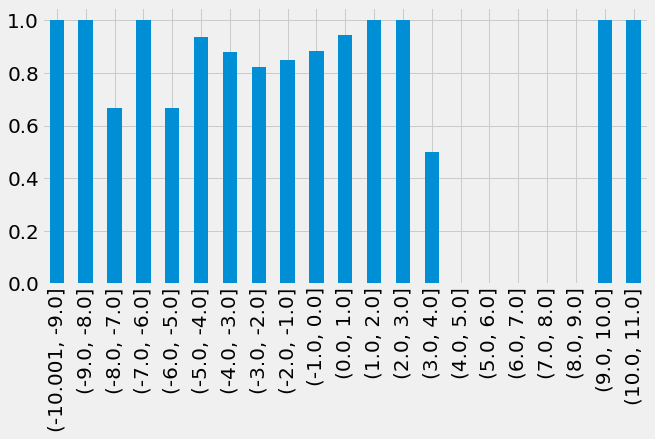

In [155]:
plots.figure()
plots.rcParams.update({'font.size': 20}) # must set in top
ax = missed_ratio.plot.bar(x=missed_ratio[0], y=missed_ratio[1], rot=90)

Additionally, I wanted to look at the greatest number of missed hits by date for Bovair. This helps to explain the discrepancy as well bewteen the absolute data and percentage data, because for the majority of the dates he pitched, the frequency of fastballs was the highest. 

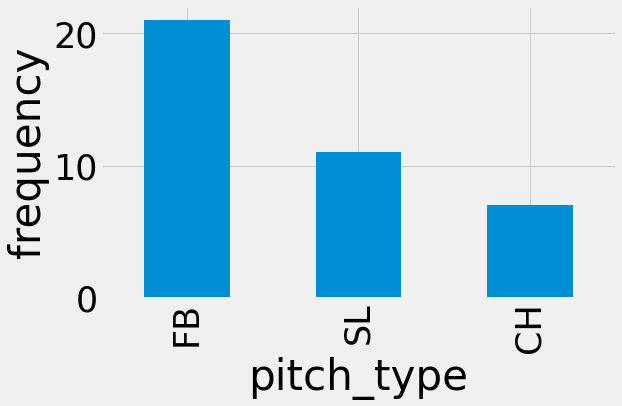

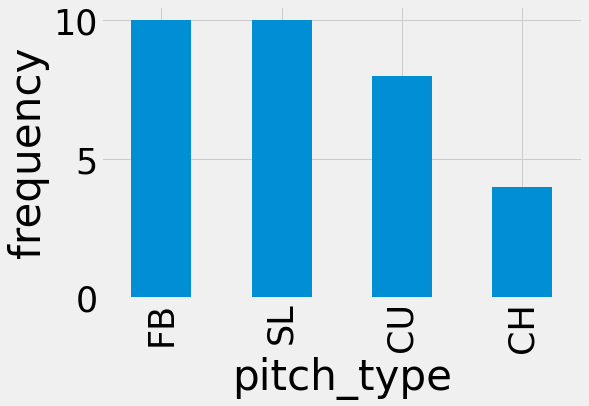

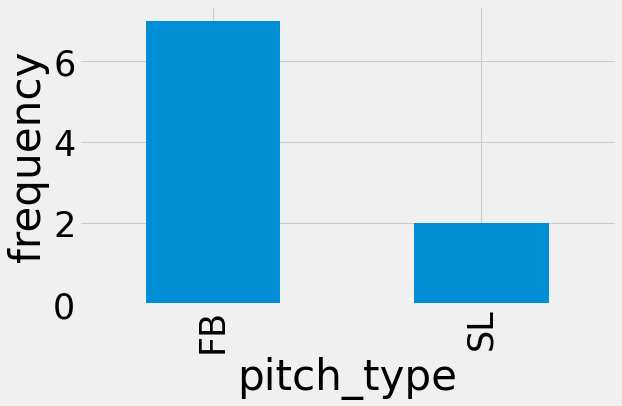

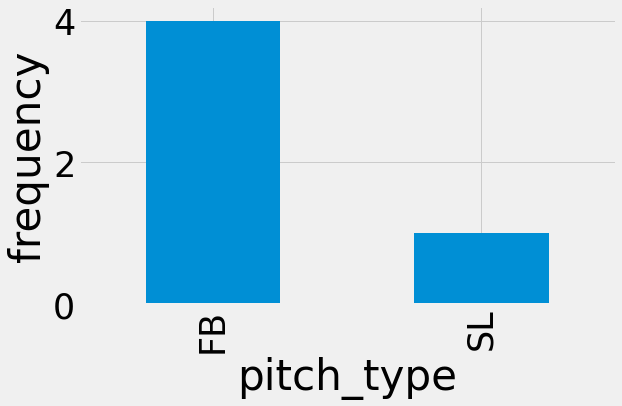

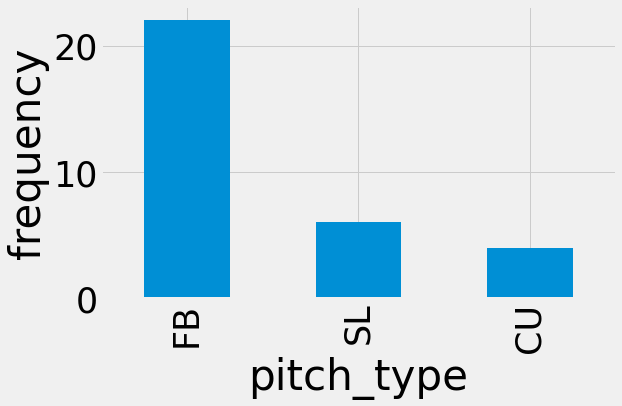

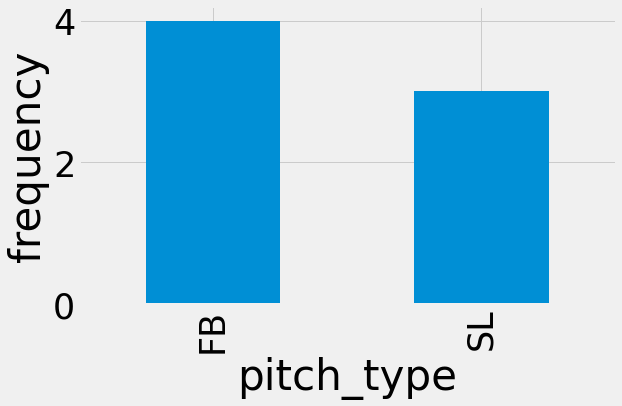

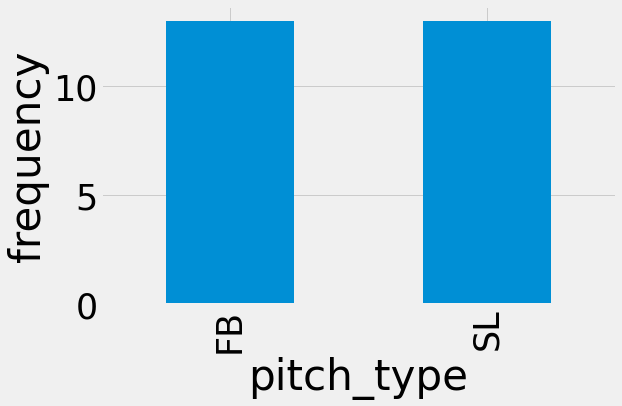

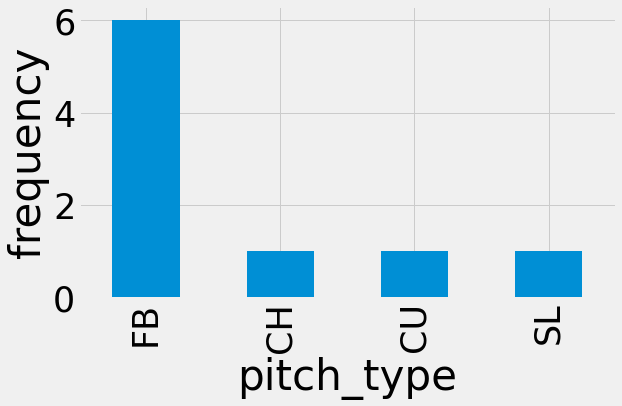

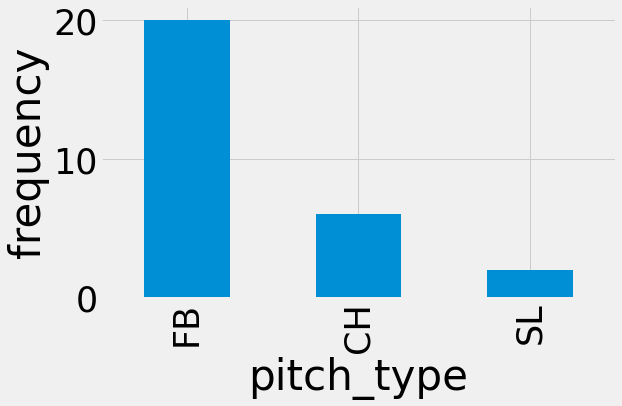

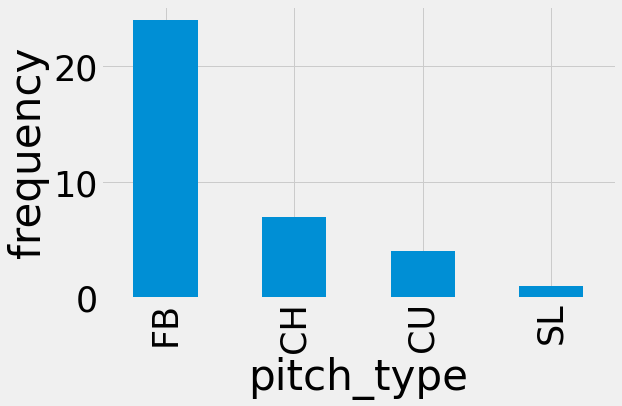

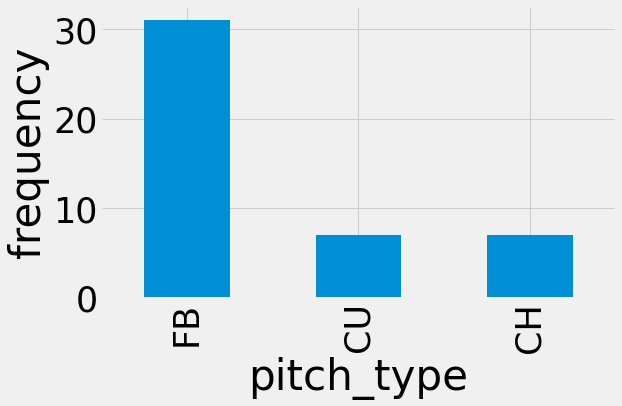

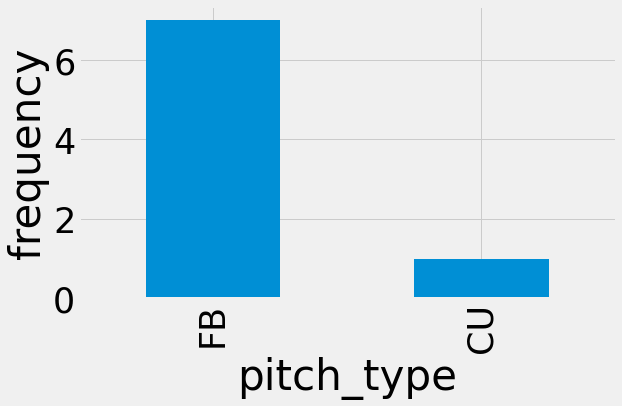

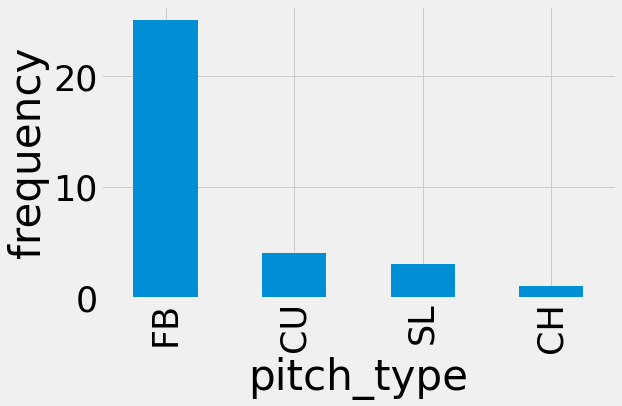

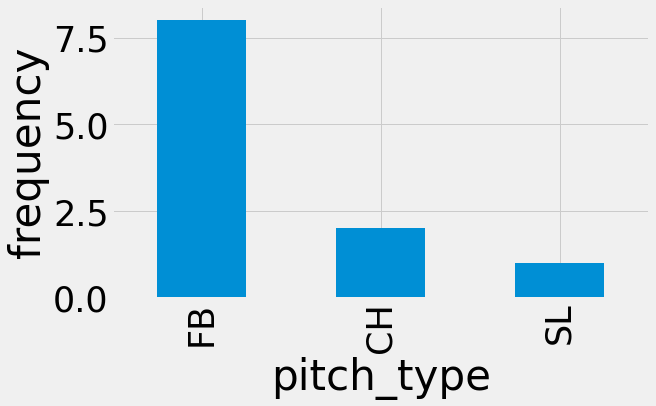

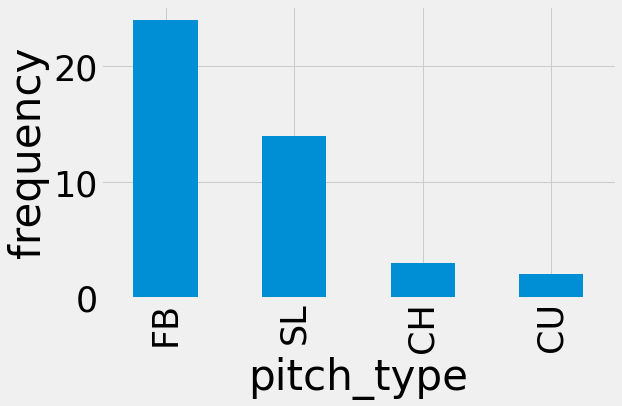

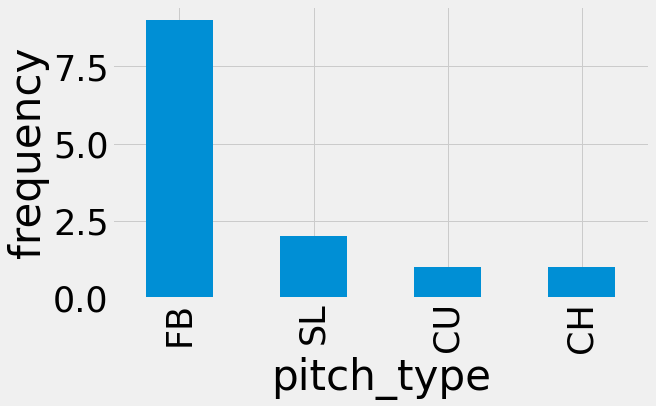

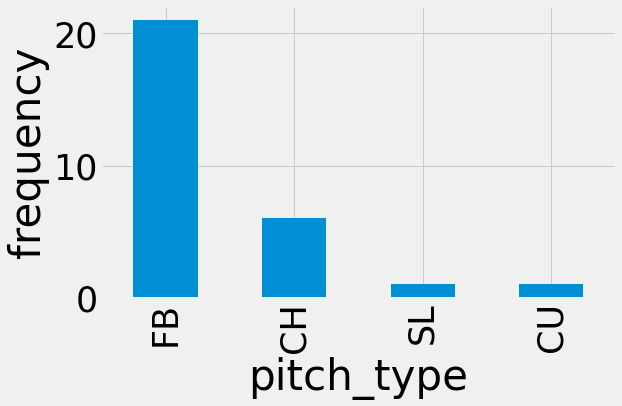

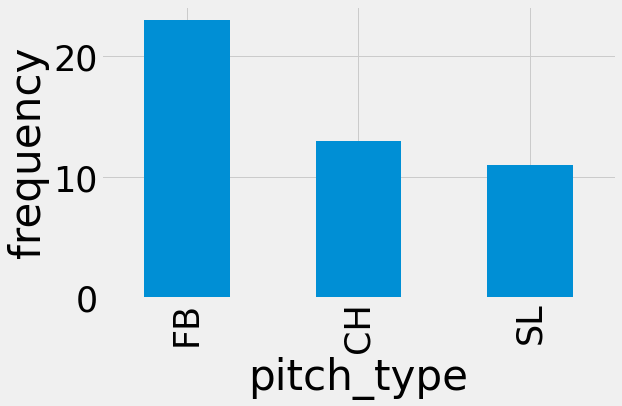

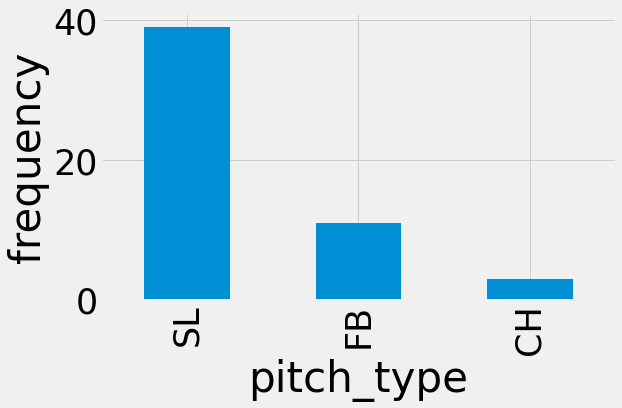

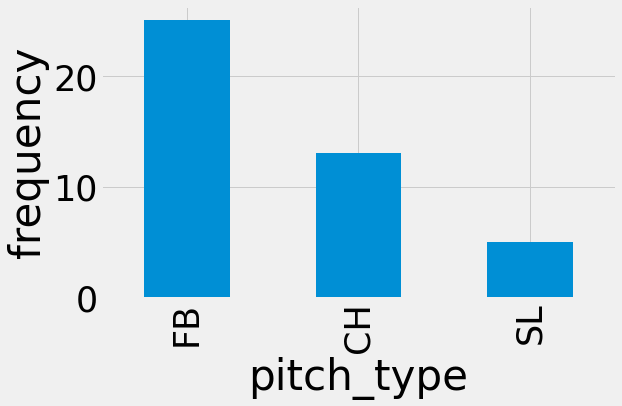

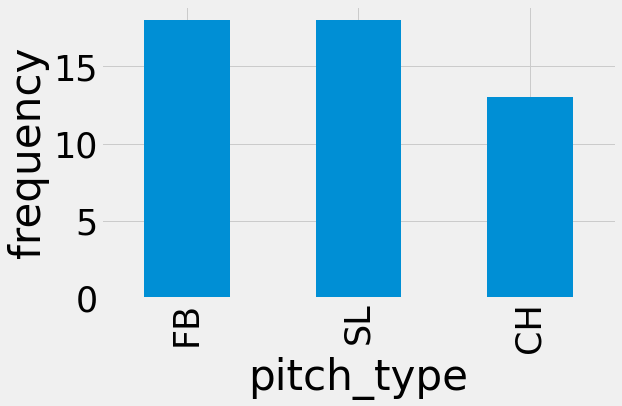

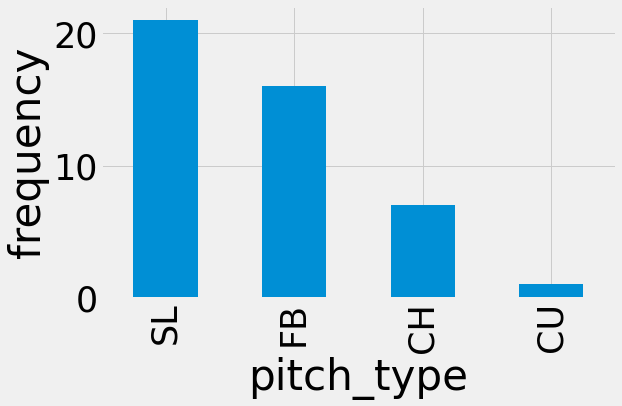

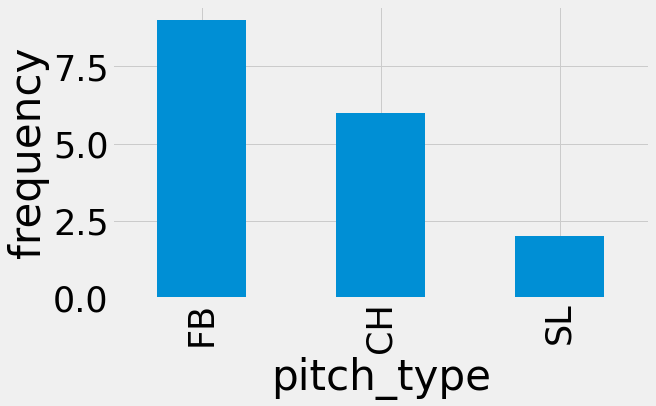

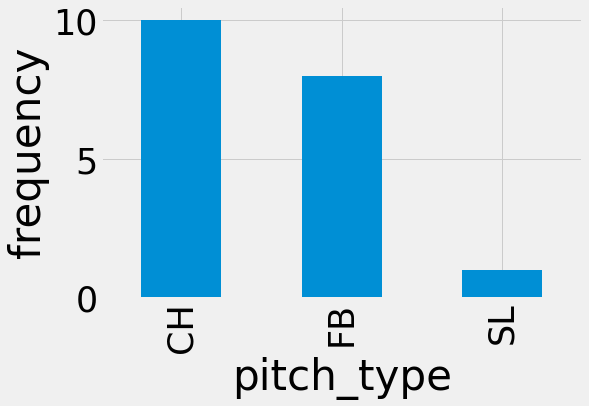

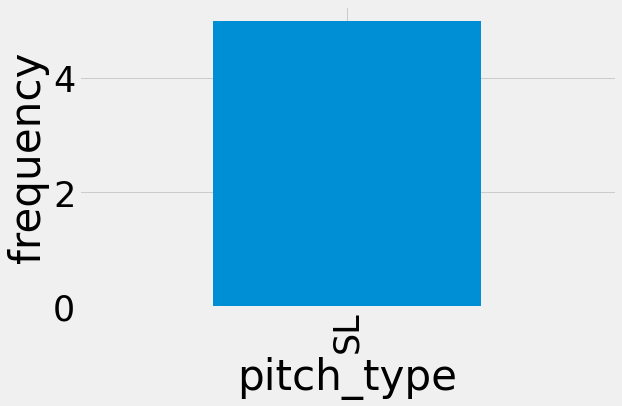

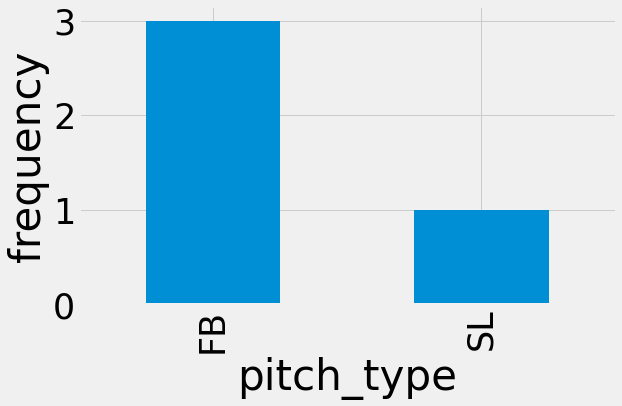

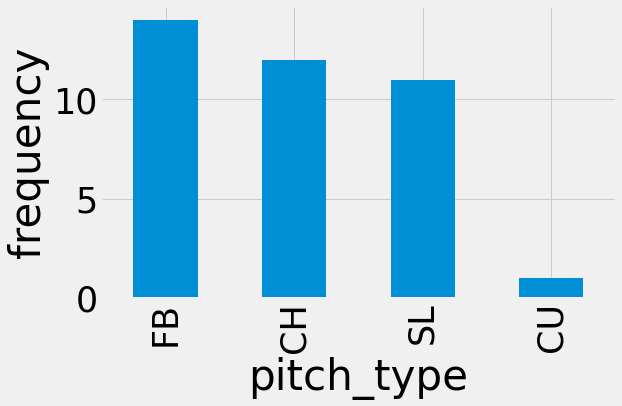

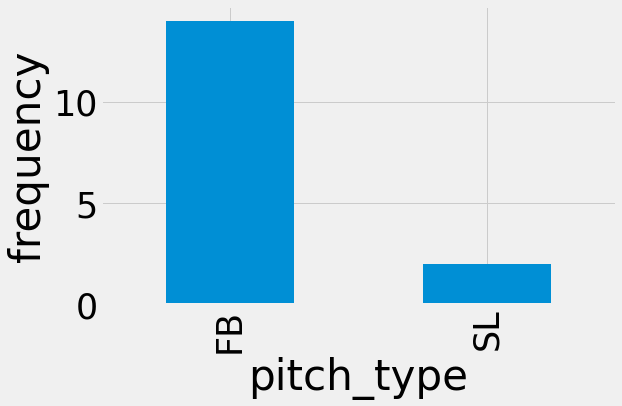

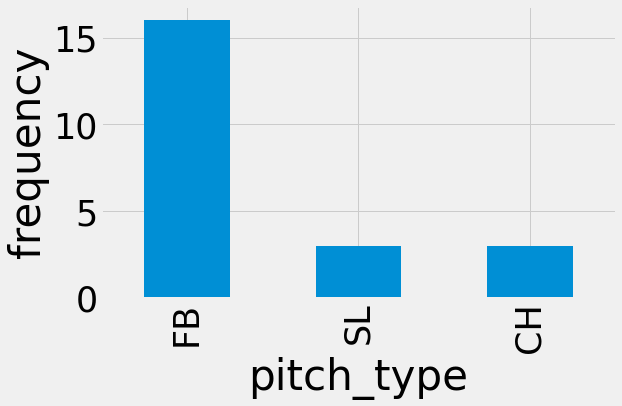

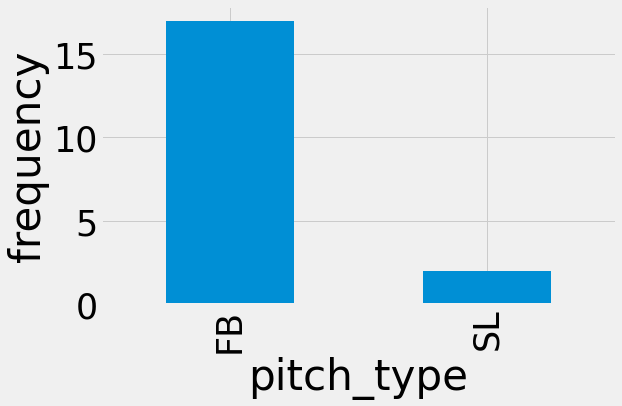

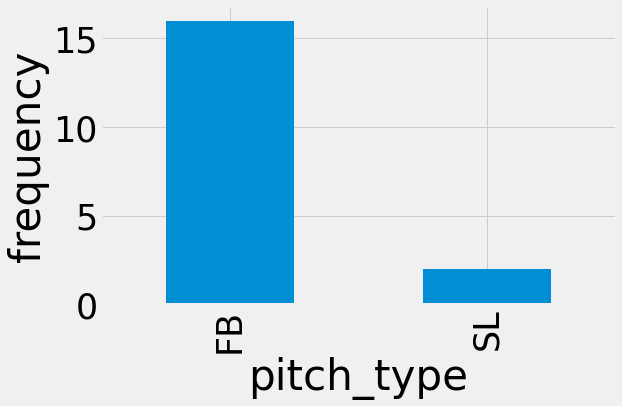

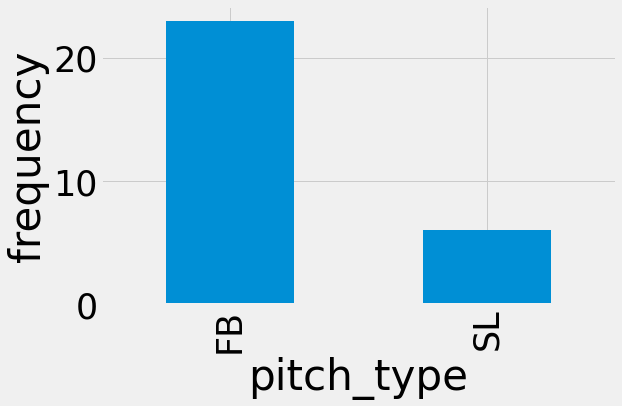

In [26]:
pitches_dates = pitches.Date.unique()

for p in pitches_dates:
    df = pd.DataFrame([])
    df = pitches[pitches['Date'] == p]
    
    plots.rcParams["figure.figsize"] = [9.50, 6.50]
    plots.rcParams["figure.autolayout"] = True

    fig, ax = plots.subplots()
    df['TaggedPitchType'].value_counts().plot(ax=ax, kind='bar', xlabel='pitch_type', ylabel='frequency')
    plots.show()
    
    
        
    
    

Throughout the project, I saw that there was a relation between effective velocity and the success of pitches for each pitcher, and that manipulating perceived velocity can have positive effects on the frequency of missed hits. However, this effective velocity changes for each pitcher. In the future, I would like to see how the order of velocity differences impacts the success of each pitcher in throughout the season. I would also like to determine how the perceived velocity of other pitchers impacts UNC hitters as well. In all, this data could be used to track improvements in pitch overtime by the creation of perceived changes while also strategizing which pitcher could be used to change effective velocity the most for each pitch type.